### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [7]:
data = pd.read_csv('data/coupons.csv')

In [9]:
pd.set_option('display.max_columns', None)
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [12]:
display(data.info())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

None

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


Observations:
1. 'car' column has just 108 non-null values which makes this column not usable.
2. Few other columns like 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50' have a few null values which need to be removed when these columns need to be used.
3. Data looks good for other columns

3. Decide what to do about your missing data -- drop, replace, other...

Not dropping any data now. Will drop as and when needed.

4. What proportion of the total observations chose to accept the coupon?



In [34]:
proportion = data['Y'].value_counts(normalize=True)
print(f"The proportion of the total observations chose to accept the coupon: {proportion[1]}")

The proportion of the total observations chose to accept the coupon: 0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

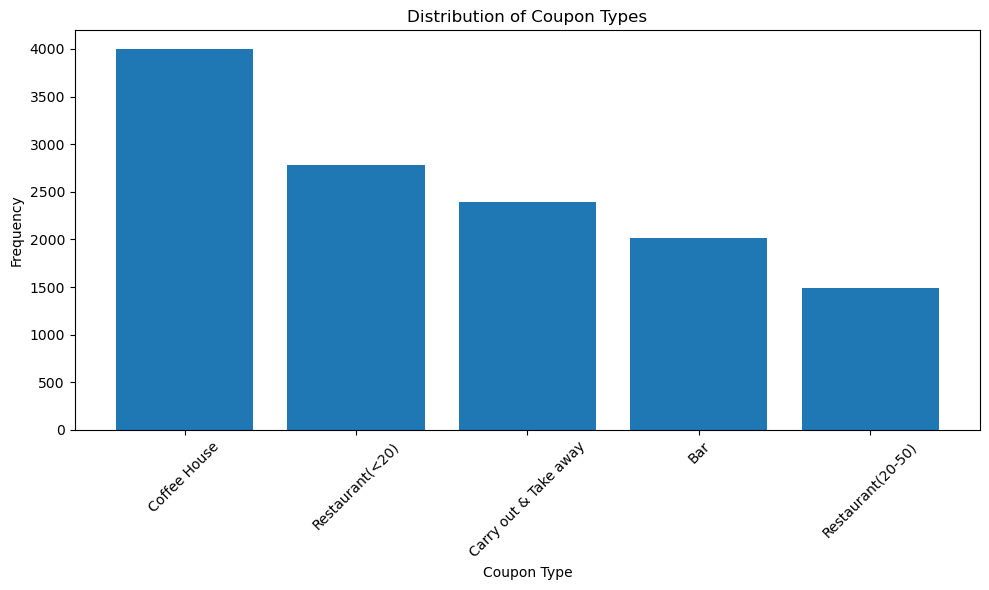

In [108]:
# Get value counts of the 'coupon' column
coupon_counts = data['coupon'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(coupon_counts.index, coupon_counts.values)

# Customize plot
plt.title("Distribution of Coupon Types")
plt.xlabel("Coupon Type")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
# Save the plot to images folder
plt.savefig('images/coupon_distribution.png')
# Show the plot
plt.show()

6. Use a histogram to visualize the temperature column.

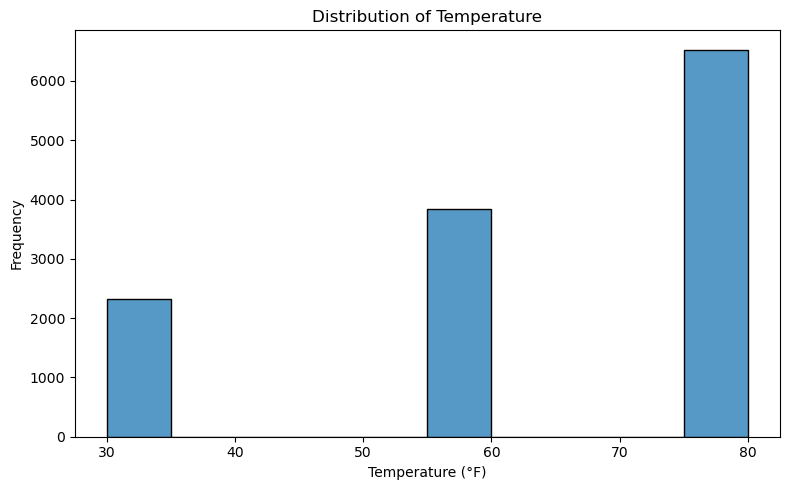

In [111]:
plt.figure(figsize=(8, 5))
# Create Seaborn histogram plot
sns.histplot(data=data, x='temperature', bins=10, kde=False)
# Customize plot
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.tight_layout()
# Save the plot to images folder
plt.savefig('images/temperature_distribution.png')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [114]:
bar_coupons_df = data[data['coupon'] == 'Bar']
bar_coupons_df = bar_coupons_df.dropna(subset=['Bar'])
bar_coupons_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1996 entries, 9 to 12682
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1996 non-null   object
 1   passanger             1996 non-null   object
 2   weather               1996 non-null   object
 3   temperature           1996 non-null   int64 
 4   time                  1996 non-null   object
 5   coupon                1996 non-null   object
 6   expiration            1996 non-null   object
 7   gender                1996 non-null   object
 8   age                   1996 non-null   object
 9   maritalStatus         1996 non-null   object
 10  has_children          1996 non-null   int64 
 11  education             1996 non-null   object
 12  occupation            1996 non-null   object
 13  income                1996 non-null   object
 14  car                   13 non-null     object
 15  Bar                   1996 non-null   obje

2. What proportion of bar coupons were accepted?


In [117]:
proportion = bar_coupons_df['Y'].value_counts(normalize=True)
print(f"The proportion of bar coupons that were accepted: {proportion[1]}")

The proportion of bar coupons that were accepted: 0.4103206412825651


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [120]:
def classify_bar_visits(val):
    if val in ['never', 'less1', '1~3']:
        return '≤ 3 times/month'
    elif val in ['4~8', 'gt8']:
        return '> 3 times/month'
    else:
        return 'Unknown'

bar_coupons_df['bar_visit_group'] = bar_coupons_df['Bar'].apply(classify_bar_visits)

# Calculate acceptance rate (Y == 1) in each group
acceptance_rates = bar_coupons_df.groupby('bar_visit_group')['Y'].mean()

# Print
print("Acceptance rates:")
print(acceptance_rates)

Acceptance rates:
bar_visit_group
> 3 times/month    0.768844
≤ 3 times/month    0.370618
Name: Y, dtype: float64


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [122]:
# Define Group A using .query()
group_a = bar_coupons_df.query(
    "Bar in ['1~3', '4~8', 'gt8'] and age in ['26', '31', '36', '41', '46', '50plus']"
)

# Group B is the rest
group_b = bar_coupons_df.drop(index=group_a.index)

# Calculate acceptance rates
rate_a = group_a['Y'].mean()
rate_b = group_b['Y'].mean()

# Print results
print(f"Group A (bar > once/month & age > 25): {rate_a:.2%} ({len(group_a)} samples)")
print(f"Group B (others): {rate_b:.2%} ({len(group_b)} samples)")

Group A (bar > once/month & age > 25): 69.52% (420 samples)
Group B (others): 33.44% (1576 samples)


Observations:
The acceptance rate of drivers who go to a bar more than once a month and are over the age of 25 is more than twice(69.52% vs 33.44%) when compared to others.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [131]:
# Define Group A using .query()
group_a = bar_coupons_df.query("Bar in ['1~3', '4~8', 'gt8'] and passanger != 'Kid(s)' and occupation != 'Farming Fishing & Forestry'")

# Define Group B as all others
group_b = bar_coupons_df.drop(index=group_a.index)

# Calculate acceptance rates
rate_a = group_a['Y'].mean()
rate_b = group_b['Y'].mean()

# Print the results
print(f"Group A (bar > once/month, no kid passenger, non-farming job): {rate_a:.2%} ({len(group_a)} samples)")
print(f"Group B (others): {rate_b:.2%} ({len(group_b)} samples)")

Group A (bar > once/month, no kid passenger, non-farming job): 71.32% (551 samples)
Group B (others): 29.48% (1445 samples)


Observations: 
The acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is 71.32% is significantly more when compared to others.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



Group A (matched any condition): 59.14% (771 samples)
Group B (others): 29.40% (1211 samples)


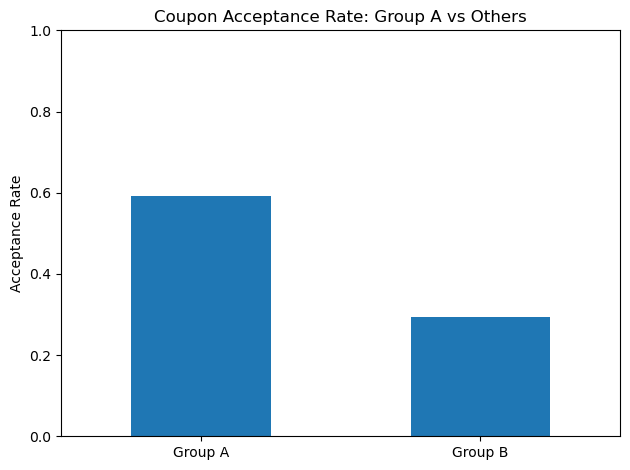

In [145]:
# Drop the row where values are NaN for below columns
filtered_df = bar_coupons_df.dropna(subset=['Bar', 'passanger', 'maritalStatus', 'age', 'RestaurantLessThan20', 'income', 'Y'])
# Define condition 1
cond1 = (
    filtered_df['Bar'].isin(['1~3', '4~8', 'gt8']) &
    (filtered_df['passanger'] != 'Kid(s)') &
    (filtered_df['maritalStatus'] != 'Widowed')
)

# Define condition 2
cond2 = (
    filtered_df['Bar'].isin(['1~3', '4~8', 'gt8']) &
    filtered_df['age'].isin(['below21', '21', '26'])
)

# Define condition 3
cond3 = (
    filtered_df['RestaurantLessThan20'].isin(['4~8', 'gt8']) &
    filtered_df['income'].isin([
        'Less than $12500',
        '$12500 - $24999',
        '$25000 - $37499',
        '$37500 - $49999'
    ])
)

# Combine all 3 conditions using OR
group_a = filtered_df[cond1 | cond2 | cond3]

# Define Group B (everyone else)
group_b = filtered_df.drop(index=group_a.index)

# Calculate acceptance rates
rate_a = group_a['Y'].mean()
rate_b = group_b['Y'].mean()

# Print results
print(f"Group A (matched any condition): {rate_a:.2%} ({len(group_a)} samples)")
print(f"Group B (others): {rate_b:.2%} ({len(group_b)} samples)")

# Plot
pd.Series({'Group A': rate_a, 'Group B': rate_b}).plot(kind='bar')
plt.title('Coupon Acceptance Rate: Group A vs Others')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Hypothesis
Drivers who accept bar coupons are typically younger, socially active, and have fewer family-related constraints (e.g., no kids or spouse in the car). They are also more likely to frequent bars regularly, belong to non-agricultural or professional occupations, and may have more disposable income or flexible schedules.

Based on the Above Observations:
Higher acceptance among:
1. Drivers who go to bars more than once/month
2. Drivers over 25 with partners or friends (not kids) as passengers
3. Drivers who aren’t widowed and aren’t from rural/agriculture jobs
4. Drivers who are young (< 30) or visit restaurants often

Lower acceptance among:
1. Drivers with kids in the car
2. Widowed individuals
3. Those from Farming, Fishing & Forestry
4. Possibly older or less socially active groups

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Analysis for Cofee House Coupons

In [161]:
# Choose data for Coffee House coupons
coffee_coupons_df = data[data['coupon'] == 'Coffee House']
# Remove NaN values
coffee_coupons_df = coffee_coupons_df.dropna(subset=['CoffeeHouse'])
coffee_coupons_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3924 entries, 1 to 12681
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3924 non-null   object
 1   passanger             3924 non-null   object
 2   weather               3924 non-null   object
 3   temperature           3924 non-null   int64 
 4   time                  3924 non-null   object
 5   coupon                3924 non-null   object
 6   expiration            3924 non-null   object
 7   gender                3924 non-null   object
 8   age                   3924 non-null   object
 9   maritalStatus         3924 non-null   object
 10  has_children          3924 non-null   int64 
 11  education             3924 non-null   object
 12  occupation            3924 non-null   object
 13  income                3924 non-null   object
 14  car                   37 non-null     object
 15  Bar                   3908 non-null   obje

In [167]:
proportion = coffee_coupons_df['Y'].value_counts(normalize=True)
print(f"The proportion of bar coupons that were accepted: {proportion[1]}")

The proportion of bar coupons that were accepted: 0.5


Observation:
Half of the Coffee House coupons were accepted

In [178]:
 # Calculate the agewise acceptance rate
agewise_acceptance = coffee_coupons_df.groupby('age')['Y'].mean()
agewise_acceptance

age
21         0.523322
26         0.516129
31         0.482927
36         0.470437
41         0.498452
46         0.513636
50plus     0.417132
below21    0.696774
Name: Y, dtype: float64

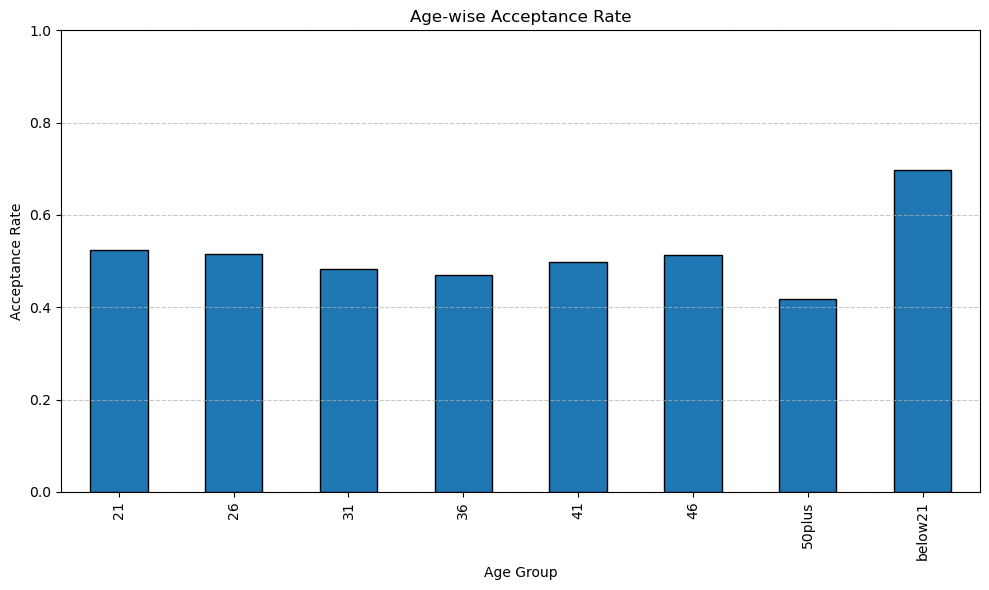

In [180]:
# Plot
agewise_acceptance.plot(kind='bar', figsize=(10, 6), edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Acceptance Rate')
plt.title('Age-wise Acceptance Rate')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Observation:
Acceptance looks even across age groups except the below 21 age group where it seems to be more around 70%.

In [183]:
# Filter the dataset to get the data for age group below 21
below21_df = coffee_coupons_df.query("age == 'below21'")
below21_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 1216 to 11928
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           155 non-null    object
 1   passanger             155 non-null    object
 2   weather               155 non-null    object
 3   temperature           155 non-null    int64 
 4   time                  155 non-null    object
 5   coupon                155 non-null    object
 6   expiration            155 non-null    object
 7   gender                155 non-null    object
 8   age                   155 non-null    object
 9   maritalStatus         155 non-null    object
 10  has_children          155 non-null    int64 
 11  education             155 non-null    object
 12  occupation            155 non-null    object
 13  income                155 non-null    object
 14  car                   0 non-null      object
 15  Bar                   155 non-null    ob

In [201]:
# Define Group A using .query()
group_a = below21_df.query("weather == 'Sunny' and destination != 'Work'")

# Group B is the rest
group_b = below21_df.drop(index=group_a.index)

# Calculate acceptance rates
rate_a = group_a['Y'].mean()
rate_b = group_b['Y'].mean()

# Print results
print(f"Group A (weather = 'Sunny' & destination != 'Work'): {rate_a:.2%} ({len(group_a)} samples)")
print(f"Group B (others): {rate_b:.2%} ({len(group_b)} samples)")

Group A (weather = 'Sunny' & destination != 'Work'): 72.22% (90 samples)
Group B (others): 66.15% (65 samples)


The Acceptance rate slightly increases if weather is sunny and destination is not work